In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping
import datetime
from pandas import Timestamp
import zipfile
# from rddl_client import DataLakeClient, get_logging_config
import codecs
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.signal import stft
import statistics
import math
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where
import random



import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  


In [2]:
def syntheticData(const):
    #
    onlyfiles = [f for f in listdir("zip_adxl362") if isfile(join("zip_adxl362", f))]
    doc = codecs.open("zip_adxl362/" + onlyfiles[0])
    df1 = pd.read_csv(doc, sep='\t')
    df3 = pd.DataFrame(columns = ['timestamp','count','x','y','z'])

    
    df1['x'] = df1['x'] + df1['x'].std()*const

    df1['y'] = df1['y'] + df1['y'].std()*const
    df1['z'] = df1['z'] + df1['z'].std()*const
    return df1

In [3]:
#reading number of files. In my case I choose 25 files.
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("zip_adxl362") if isfile(join("zip_adxl362", f))]
i = 0
df2 = pd.DataFrame()
for x in range(len(onlyfiles)):
    doc = codecs.open("zip_adxl362/" + onlyfiles[x])
    df1 = pd.read_csv(doc, sep='\t')
    df2 = pd.concat([df2, df1], ignore_index = True)
    i = i+1
    if i == 40:
        break



In [4]:
# as I am doing some changes below on variables itsel,
# it changes. That is my I am using copy of the original
# variable. Whenever I need to go back I can simply run
# this part and get initial value.
df = df2.copy()

In [5]:


for i in range(1, 20):
    r_m = round(random.uniform(0.1, 0.13)*i,2)
    print(r_m)
    df = pd.concat([df, syntheticData(r_m).iloc[:5120, :]], ignore_index = True)
    df = pd.concat([df, syntheticData(round(random.uniform(0.1, 0.13)*i,2)).iloc[:5120, :]], ignore_index = True)
for i in range(20, 10, -1):
    #print(i)
    r_m = round(random.uniform(0.1, 0.13)*i,2)
    print(r_m)
    df = pd.concat([df, syntheticData(r_m).iloc[:5120, :]], ignore_index = True)
    df = pd.concat([df, syntheticData(round(random.uniform(0.1, 0.13)*i,2)).iloc[:5120, :]], ignore_index = True)
for i in range(10, 25):
    #print(i)
    r_m = round(random.uniform(0.1, 0.13)*i,2)
    print(r_m)
    df = pd.concat([df, syntheticData(r_m).iloc[:5120, :]], ignore_index = True)
    df = pd.concat([df, syntheticData(round(random.uniform(0.1, 0.13)*i,2)).iloc[:5120, :]], ignore_index = True)
for i in range(25, 12, -1):
    #print(i)
    r_m = round(random.uniform(0.1, 0.13)*i,2)
    print(r_m)
    df = pd.concat([df, syntheticData(r_m).iloc[:5120, :]], ignore_index = True)
for i in range(12, 50):
    #print(i)
    r_m = round(random.uniform(0.1, 0.13)*i,2)
    print(r_m)
    df = pd.concat([df, syntheticData(r_m).iloc[:5120, :]], ignore_index = True)
    df = pd.concat([df, syntheticData(round(random.uniform(0.1, 0.13)*i,2)).iloc[:5120, :]], ignore_index = True)
for i in range(35, 80):
    #print(i)
    r_m = round(pow(random.uniform(0.1, 0.13)*i,1.1),2)
    print(r_m)
    df = pd.concat([df, syntheticData(r_m).iloc[:5120, :]], ignore_index = True)

    #df = pd.concat([df, syntheticData(round(random.uniform(0.1, 0.13)*i,2)).iloc[:5120, :]], ignore_index = True)
# for i in range(50, 101):
#     df = pd.concat([df, syntheticData(pow(0.1*i,3)).iloc[:10240, :]], ignore_index = True)
# for i in range(25, 40):
#     df = pd.concat([df, syntheticData(pow(0.13*i)).iloc[:10240, :]], ignore_index = True)
# for i in range(40, 60):
#     df = pd.concat([df, syntheticData(pow(0.17*i)).iloc[:10240, :]], ignore_index = True)
# for i in range(70, 80):
#     df = pd.concat([df, syntheticData(0.2*i).iloc[:10240, :]], ignore_index = True)
# for i in range(80, 101):
#     df = pd.concat([df, syntheticData(0.25*i).iloc[:10240, :]], ignore_index = True)




0.12
0.24
0.38
0.4
0.51
0.67
0.79
0.88
0.99
1.18
1.38
1.56
1.41
1.67
1.84
1.6
1.82
1.86
2.24
2.37
2.14
2.32
2.07
1.94
1.63
1.6
1.31
1.53
1.11
1.15
1.33
1.24
1.41
1.46
1.87
1.81
1.85
1.88
1.92
2.06
2.34
2.36
2.46
2.49
3.13
2.4
2.69
2.35
2.45
2.28
2.24
1.83
1.8
1.62
1.68
1.55
1.43
1.32
1.4
1.75
1.77
1.76
1.93
2.16
2.32
2.1
2.36
2.33
2.98
2.69
2.71
2.95
2.85
3.05
3.74
3.52
3.35
4.06
3.88
4.39
4.31
4.51
4.74
4.87
4.1
4.25
5.28
4.23
5.33
5.64
5.62
4.95
5.66
5.96
5.9
5.17
4.34
5.18
4.58
5.87
5.54
6.2
6.4
6.44
5.51
6.68
6.93
6.7
6.29
6.82
6.6
6.39
7.03
6.43
7.08
7.99
6.79
7.04
7.85
7.71
7.71
9.27
7.66
8.82
8.51
8.6
10.23
9.24
8.65
10.39
9.37
9.04
9.16
9.95
11.22
9.32
9.67
11.0
10.55
12.25


In [6]:
def sumAbsoluteValues(np):
    return sum(abs(number) for number in np)

In [7]:
def pulseIndex(np, length):
    return abs(max(np,key=abs))*length/sumAbsoluteValues(np)

In [8]:
def marginFactor(np, length):
    add = sum(math.sqrt(abs(number)) for number in np)
    return abs(max(np,key=abs))/(add/length)**2

In [9]:
# feature extraction part
from scipy.fft import fft
def getAllDataVM(val):

    length = int(len(df.index)/1024)
    z = np.split(df['z'],length)
    x = np.split(df[val],length)
    y = np.split(df['y'],length)

    pds = pd.DataFrame(columns=['min','max','std','mean','skewness','kurtosis'])

    mins = []
    maxs = []
    std = []
    mean = []
    skewness = []
    kurtosiss = []
    sftf = []
    rms = []
    pk = []
    variance = []
    pulse_index = []
    margin_factor = []
    waveform_factor = []
    ffts = []
    for i in range(length):
        mins.append(x[i].min())
        maxs.append(x[i].max())
        std.append(x[i].std())
        mean.append(x[i].mean())
        skewness.append(skew(x[i], axis=0, bias=True))
        kurtosiss.append(kurtosis(x[i]))
        rms.append(np.sqrt(np.mean(x[i]**2))) 
        pk.append(x[i].max()-x[i].min())
        variance.append(statistics.variance(x[i]))
        pulse_index.append(pulseIndex(x[i], length))
        margin_factor.append(marginFactor(x[i],length))
        waveform_factor.append(np.mean(x[i]**2)/x[i].apply(abs).mean())
        # ffts.append(fft(np.array(x[i])))

    pd_mins = pd.DataFrame({'min_' + val: mins})
    pd_maxs = pd.DataFrame({'max_' + val: maxs})
    pd_std = pd.DataFrame({'std_' + val: std})
    pd_mean = pd.DataFrame({'mean_' + val: mean})
    pd_skewness = pd.DataFrame({'skewness_' + val: skewness})
    pd_kurtosis = pd.DataFrame({'kurtosis_' + val: kurtosiss})
    pd_rms = pd.DataFrame({'rms_' + val: rms})
    pd_pk = pd.DataFrame({'diff_' + val: pk})
    pd_variance = pd.DataFrame({'variance_' + val: variance})
    pd_pulse_index = pd.DataFrame({'pulse_index_' + val: pulse_index}) 
    pd_mf = pd.DataFrame({'margin_factor_' + val: margin_factor}) 
    pd_wf = pd.DataFrame({'wavefor_factor_' + val: waveform_factor}) 
    pd_fft = pd.DataFrame({'fft_' + val: ffts}) 
    #all_data = pd_mean.join(pd_skewness).join(pd_rms).join(pd_wf).join(pd_pulse_index).join(pd_mf).join(pd_kurtosis)
    data_vm = pd_mean.join(pd_std).join(pd_skewness).join(pd_kurtosis).join(pd_rms).join(pd_pulse_index).join(pd_mf).join(pd_wf)
    #all_data = pd_mins
    #all_data = pd_mean.join(pd_skewness).join(pd_rms).join(pd_wf)
    #all_data = pd_mean.join(pd_rms)
    
    return data_vm

#njjnnjnjn




df_vm_new_x = getAllDataVM('x')
df_vm_new_y = getAllDataVM('y')
df_vm_new_z = getAllDataVM('z')

#df_new = df_new_x.join(df_new_y).join(df_new_z)
df_vm_new = df_vm_new_x.join(df_vm_new_y).join(df_vm_new_z)
        



In [10]:
model = OneClassSVM(kernel = 'rbf', nu = 0.2).fit(df_vm_new)
print(model)

OneClassSVM(nu=0.2)


In [11]:
# prediction
y_pred = model.predict(df_vm_new)


import numpy

scores = model.decision_function(df_vm_new)

y_pred = model.predict(df_vm_new)


for i in range(y_pred.size):
    print(str(i) + " " + str(y_pred[i]))

unique, counts = numpy.unique(df_vm_new, return_counts=True)

0 1
1 1
2 1
3 1
4 1
5 -1
6 -1
7 1
8 1
9 -1
10 1
11 1
12 1
13 1
14 1
15 -1
16 1
17 1
18 -1
19 1
20 -1
21 1
22 1
23 1
24 1
25 1
26 1
27 -1
28 1
29 -1
30 1
31 1
32 -1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 -1
44 1
45 1
46 1
47 1
48 1
49 1
50 -1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 -1
68 1
69 1
70 1
71 1
72 1
73 1
74 -1
75 1
76 1
77 1
78 -1
79 1
80 1
81 1
82 1
83 -1
84 1
85 -1
86 -1
87 -1
88 -1
89 1
90 -1
91 1
92 1
93 -1
94 1
95 1
96 1
97 1
98 1
99 -1
100 1
101 1
102 1
103 1
104 -1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 -1
126 -1
127 1
128 -1
129 1
130 1
131 1
132 1
133 -1
134 1
135 1
136 1
137 1
138 1
139 -1
140 1
141 -1
142 1
143 -1
144 1
145 1
146 1
147 1
148 -1
149 1
150 1
151 1
152 1
153 1
154 1
155 1
156 1
157 -1
158 -1
159 1
160 -1
161 1
162 1
163 -1
164 1
165 1
166 1
167 -1
168 1
169 1
170 -1
171 -1
172 1
173 -1
174 1
175 1
176 1
177 -1
17

In [12]:
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = df_vm_new.iloc[outlier_index]

In [13]:
from sklearn.metrics import f1_score

anomaly_scores = model.decision_function(df_vm_new)

true_labels = np.where(anomaly_scores < 1.7, -1, 1)  

# Calculate the F1 score using ground truth labels
f1 = f1_score(true_labels, model.predict(df_vm_new))

print("F1 Score:", f1)

F1 Score: 0.9056511056511056


In [14]:
from sklearn.metrics import roc_auc_score, average_precision_score
# Predict anomaly scores for data points
anomaly_scores = model.decision_function(df_vm_new)

true_labels = np.where(anomaly_scores < 1.7, -1, 1)  

auc_pr = average_precision_score(true_labels, -anomaly_scores)

print("AUC-PR:", auc_pr)
# j = 1
# for i in anomaly_scores:
#     print(j,i)
#     j = j+1

AUC-PR: 0.44626747965407665


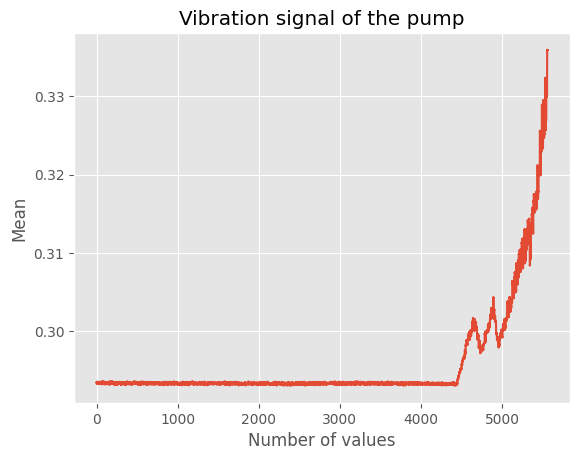

In [15]:
df = df_vm_new.drop(df_vm_new[df_vm_new['mean_x'] < 0.2].index)
# plotting the points 
l = list(range(0,df['mean_x'].size))
plt.plot(l, df['mean_x'])
# y_line = 0.305  # Replace with the desired y-coordinate for your horizontal line
# plt.axhline(y=y_line, color='blue', linestyle='--', label='Horizontal Line')
  
# naming the x axis
plt.xlabel('Number of values')
# naming the y axis
plt.ylabel('Mean')

# ytick_positions = [0.3, 0.31, 0.32]
# plt.yticks(ytick_positions,ytick_labels)
  
# giving a title to my graph
plt.title('Vibration signal of the pump')
  
# function to show the plot
plt.show()

In [15]:
from sklearn.metrics import silhouette_samples
anomaly_scores = model.decision_function(df_vm_new)

# Calculate a silhouette-like score
silhouette_scores = silhouette_samples(df_vm_new, -anomaly_scores)
average_silhouette_score = silhouette_scores.mean()

print("Silhouette-Like Score:", average_silhouette_score)

Silhouette-Like Score: 0.046693920565443504


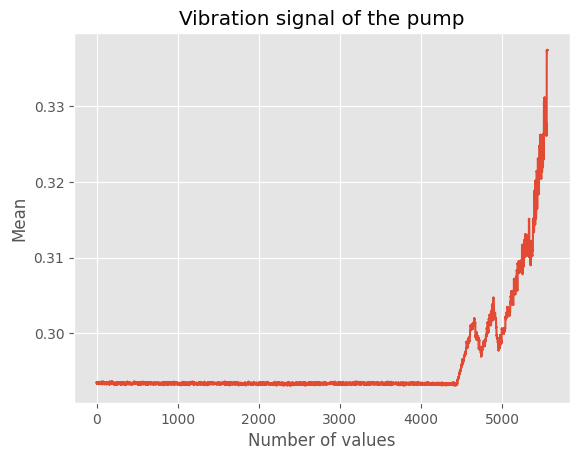

In [16]:
df = df_vm_new.drop(df_vm_new[df_vm_new['mean_x'] < 0.2].index)
# plotting the points 
l = list(range(0,df['mean_x'].size))
plt.plot(l, df['mean_x'])
# y_line = 0.305  # Replace with the desired y-coordinate for your horizontal line
# plt.axhline(y=y_line, color='blue', linestyle='--', label='Horizontal Line')
  
# naming the x axis
plt.xlabel('Number of values')
# naming the y axis
plt.ylabel('Mean')

# ytick_positions = [0.3, 0.31, 0.32]
# plt.yticks(ytick_positions,ytick_labels)
  
# giving a title to my graph
plt.title('Vibration signal of the pump')
  
# function to show the plot
plt.show()

In [17]:
plt.scatter(df_vm_new["min"], df_vm_new["mean"], c = "b")
plt.scatter(outlier_values1["min"], outlier_values1["mean"], c = "r")

KeyError: 'min'

In [ ]:
plt.scatter(df_vm_new["min"], df_vm_new["mean"], c = "b")
plt.scatter(outlier_values1["min"], outlier_values1["mean"], c = "r")

In [ ]:

# Assuming you have your training data in X_train

# Perform grid search for nu
param_grid = {'nu': [0.1, 0.01, 0.05, 0.2]}
grid_search = GridSearchCV(OneClassSVM(), param_grid, cv=5)

# Train the OneClassSVM model
grid_search.fit(df_vm_new)

# Get the best nu value
best_nu = grid_search.best_params_['nu']

# Use the best nu value in the final model
final_model = OneClassSVM(nu=best_nu)

# Assuming you have your test data in X_test
# Obtain anomaly scores using decision_function
anomaly_scores = final_model.decision_function(df_vm_new)
